# 十九.图像分割之基于K-Means聚类的区域分割

本节主要讲解基于理论的图像分割方法，通过K-Means聚类算法实现图像分割或颜色分层处理。基础性文章，希望对你有所帮助。

1.K-Means原理

2.K-Means聚类分割灰度图像

3.K-Means聚类对比分割彩色图像


## 19.1.K-Means聚类原理

K-Means聚类是最常用的聚类算法，最初起源于信号处理，其目标是将数据点划分为K个类簇，找到每个簇的中心并使其度量最小化。该算法的最大优点是简单、便于理解，运算速度较快，缺点是只能应用于连续型数据，并且要在聚类前指定聚集的类簇数。
下面是K-Means聚类算法的分析流程，步骤如下：

第一步，确定K值，即将数据集聚集成K个类簇或小组。

第二步，从数据集中随机选择K个数据点作为质心（Centroid）或数据中心。

第三步，分别计算每个点到每个质心之间的距离，并将每个点划分到离最近质心的小组，跟定了那个质心。

第四步，当每个质心都聚集了一些点后，重新定义算法选出新的质心。

第五步，比较新的质心和老的质心，如果新质心和老质心之间的距离小于某一个阈值，则表示重新计算的质心位置变化不大，收敛稳定，则认为聚类已经达到了期望的结果，算法终止。

第六步，如果新的质心和老的质心变化很大，即距离大于阈值，则继续迭代执行第三步到第五步，直到算法终止。


下图是对身高和体重进行聚类的算法，将数据集的人群聚集成三类。


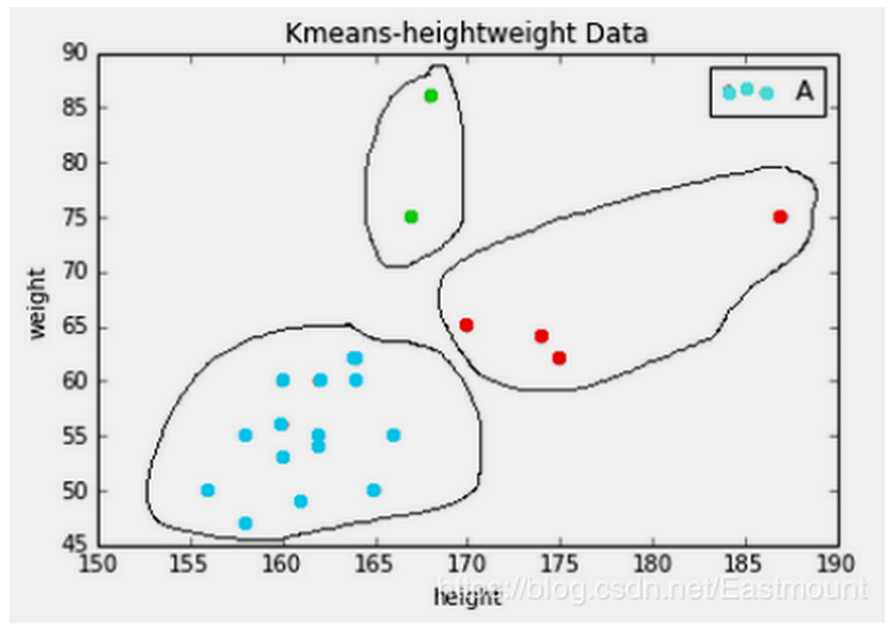

## 19.2.K-Means聚类分割灰度图像

在图像处理中，通过K-Means聚类算法可以实现图像分割、图像聚类、图像识别等操作，本小节主要用来进行图像颜色分割。假设存在一张100×100像素的灰度图像，它由10000个RGB灰度级组成，我们通过K-Means可以将这些像素点聚类成K个簇，然后使用每个簇内的质心点来替换簇内所有的像素点，这样就能实现在不改变分辨率的情况下量化压缩图像颜色，实现图像颜色层级分割。


在OpenCV中，Kmeans()函数原型如下所示：retval, bestLabels, centers = kmeans(data, K, bestLabels, criteria, attempts, flags[, centers])data表示聚类数据，最好是np.flloat32类型的N维点集K表示聚类类簇数bestLabels表示输出的整数数组，用于存储每个样本的聚类标签索引criteria表示算法终止条件，即最大迭代次数或所需精度。在某些迭代中，一旦每个簇中心的移动小于criteria.epsilon，算法就会停止attempts表示重复试验kmeans算法的次数，算法返回产生最佳紧凑性的标签flags表示初始中心的选择，两种方法是cv2.KMEANS_PP_CENTERS ;和cv2.KMEANS_RANDOM_CENTERScenters表示集群中心的输出矩阵，每个集群中心为一行数据


下面使用该方法对灰度图像颜色进行分割处理，需要注意，在进行K-Means聚类操作之前，需要将RGB像素点转换为一维的数组，再将各形式的颜色聚集在一起，形成最终的颜色分割。


(400, 400)


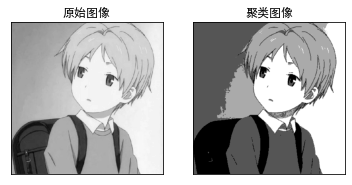

In [10]:
# coding: utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像灰度颜色
img = cv2.imread('test.jpg', 0) 
print(img.shape)

#获取图像高度、宽度
rows, cols = img.shape[:]

#图像二维像素转换为一维
data = img.reshape((rows * cols, 1))
data = np.float32(data)

#定义中心 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成4类
compactness, labels, centers = cv2.kmeans(data, 4, None, criteria, 10, flags)

#生成最终图像
dst = labels.reshape((img.shape[0], img.shape[1]))

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = [u'原始图像', u'聚类图像']  
images = [img, dst]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()



输出结果如图所示，左边为灰度图像，右边为K-Means聚类后的图像，它将灰度级聚集成四个层级，相似的颜色或区域聚集在一起。


## 19.3.K-Means聚类对比分割彩色图像

下面代码是对彩色图像进行颜色分割处理，它将彩色图像聚集成2类、4类和64类。


(400, 400, 3)


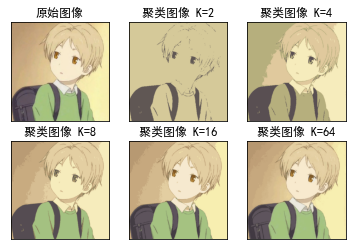

In [9]:
# coding: utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg') 
print(img.shape)

#图像二维像素转换为一维
data = img.reshape((-1,3))
data = np.float32(data)

#定义中心 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成2类
compactness, labels2, centers2 = cv2.kmeans(data, 2, None, criteria, 10, flags)

#K-Means聚类 聚集成4类
compactness, labels4, centers4 = cv2.kmeans(data, 4, None, criteria, 10, flags)

#K-Means聚类 聚集成8类
compactness, labels8, centers8 = cv2.kmeans(data, 8, None, criteria, 10, flags)

#K-Means聚类 聚集成16类
compactness, labels16, centers16 = cv2.kmeans(data, 16, None, criteria, 10, flags)

#K-Means聚类 聚集成64类
compactness, labels64, centers64 = cv2.kmeans(data, 64, None, criteria, 10, flags)

#图像转换回uint8二维类型
centers2 = np.uint8(centers2)
res = centers2[labels2.flatten()]
dst2 = res.reshape((img.shape))

centers4 = np.uint8(centers4)
res = centers4[labels4.flatten()]
dst4 = res.reshape((img.shape))

centers8 = np.uint8(centers8)
res = centers8[labels8.flatten()]
dst8 = res.reshape((img.shape))

centers16 = np.uint8(centers16)
res = centers16[labels16.flatten()]
dst16 = res.reshape((img.shape))

centers64 = np.uint8(centers64)
res = centers64[labels64.flatten()]
dst64 = res.reshape((img.shape))

#图像转换为RGB显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
dst4 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
dst8 = cv2.cvtColor(dst8, cv2.COLOR_BGR2RGB)
dst16 = cv2.cvtColor(dst16, cv2.COLOR_BGR2RGB)
dst64 = cv2.cvtColor(dst64, cv2.COLOR_BGR2RGB)

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = [u'原始图像', u'聚类图像 K=2', u'聚类图像 K=4',
          u'聚类图像 K=8', u'聚类图像 K=16',  u'聚类图像 K=64']  
images = [img, dst2, dst4, dst8, dst16, dst64]  
for i in range(6):  
   plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()



输出结果如图所示，左边为灰度图像，右边为K-Means聚类后的图像，它将灰度级聚集成四个层级，相似的颜色或区域聚集在一起。